In [2]:
import xarray as xr
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('default')
sns.set_palette("colorblind")
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.weight'] = 'light'
rcParams['mathtext.fontset'] = 'cm'
rcParams['mathtext.rm'] = 'serif'
mpl.rcParams["figure.dpi"] = 500
import cartopy.crs as ccrs
import cartopy as ct
import matplotlib.colors as c
import regionmask
import cmasher as cmr
import scipy
from cartopy.util import add_cyclic_point
mpl.rcParams['hatch.linewidth'] = 0.375
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

In [6]:
u10 = xr.open_mfdataset('/hurrell-scratch2/ivyglade/pdo/ERA5_S06/u10/*s/e5.oper.an.sfc.128_165_10u.*.nc', combine='nested', concat_dim='time')['VAR_10U']
v10 = xr.open_mfdataset('/hurrell-scratch2/ivyglade/pdo/ERA5_S06/v10/*s/e5.oper.an.sfc.128_166_10v.*.nc', combine='nested', concat_dim='time')['VAR_10V']

u6k = xr.open_mfdataset('/hurrell-scratch2/ivyglade/pdo/ERA5_S06/u_6k/*.nc', combine='nested', concat_dim='time')['__xarray_dataarray_variable__']
v6k = xr.open_mfdataset('/hurrell-scratch2/ivyglade/pdo/ERA5_S06/v_6k/*.nc', combine='nested', concat_dim='time')['__xarray_dataarray_variable__']

In [7]:
# subset time periods of interest
u10_mam = u10.sel(time=u10.time.dt.month.isin([3, 4, 5])).dropna(dim='time').load()
v10_mam = v10.sel(time=v10.time.dt.month.isin([3, 4, 5])).dropna(dim='time').load()

u6k_mam = u6k.sel(time=u6k.time.dt.month.isin([3, 4, 5])).dropna(dim='time').load()
v6k_mam = v6k.sel(time=v6k.time.dt.month.isin([3, 4, 5])).dropna(dim='time').load()

In [11]:
# Calculate mean wind
wind_10_mam = np.sqrt(u10_mam**2 + v10_mam**2)

In [12]:
wind_6k_mam = np.sqrt(u6k_mam**2 + v6k_mam**2)

In [13]:
wind_10_not_5 = xr.where(wind_10_mam > 5, 1, 0)

In [14]:
wind_6k_LT_sfc = xr.where(wind_6k_mam < wind_10_mam, 1, 0)

In [16]:
wind_10_not_5_sum = wind_10_not_5.sum(dim='time')
wind_6k_LT_sfc_sum = wind_6k_LT_sfc.sum(dim='time')

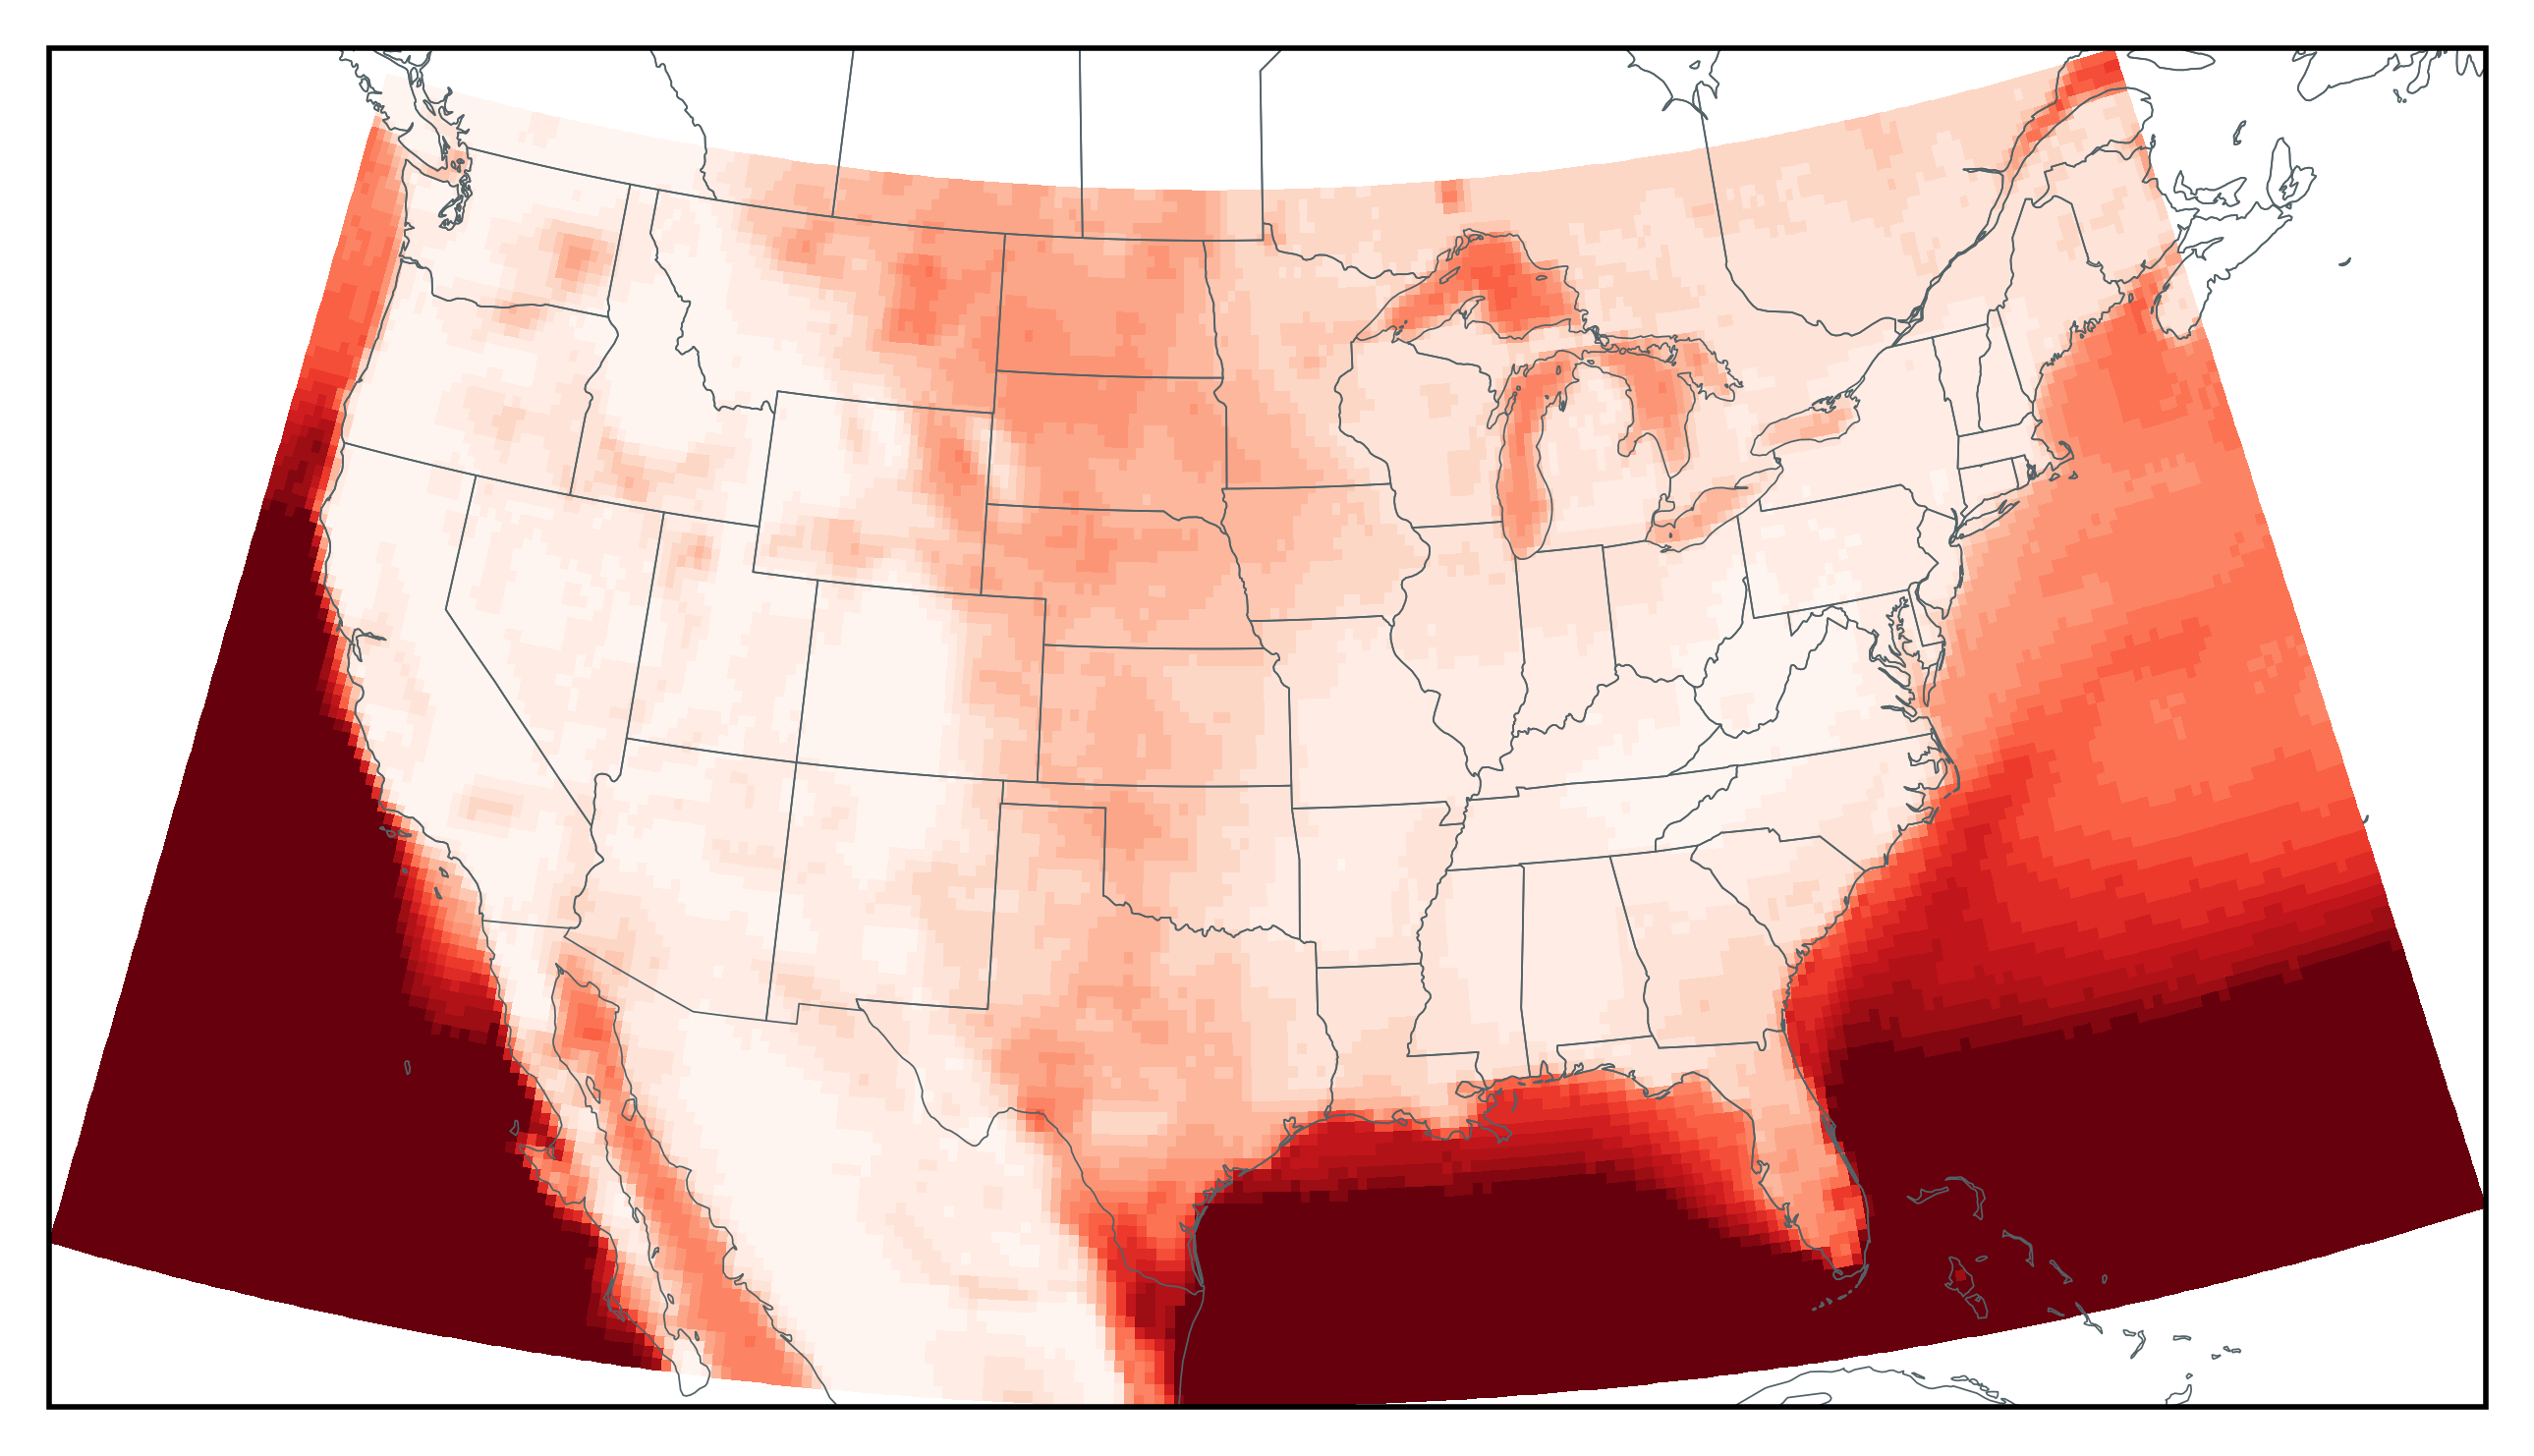

In [18]:
fig, ax = plt.subplots(subplot_kw=dict(projection=ccrs.AlbersEqualArea(central_longitude=-97, central_latitude=36.5)))

bounds = np.arange(0, 1050, 50)
norm = c.BoundaryNorm(bounds, plt.get_cmap('Reds').N)

ax.coastlines(lw=0.25, color='xkcd:gunmetal')
ax.add_feature(ct.feature.STATES, lw=0.25, edgecolor='xkcd:gunmetal')

ax.pcolormesh(u10['longitude'], v10['latitude'], wind_6k_LT_sfc_sum, transform=ccrs.PlateCarree(), cmap='Reds', norm=norm)